# UNDER CONSTRUCTION

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
data = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
duplicatedRows = data[data.duplicated()]
print(duplicatedRows)

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


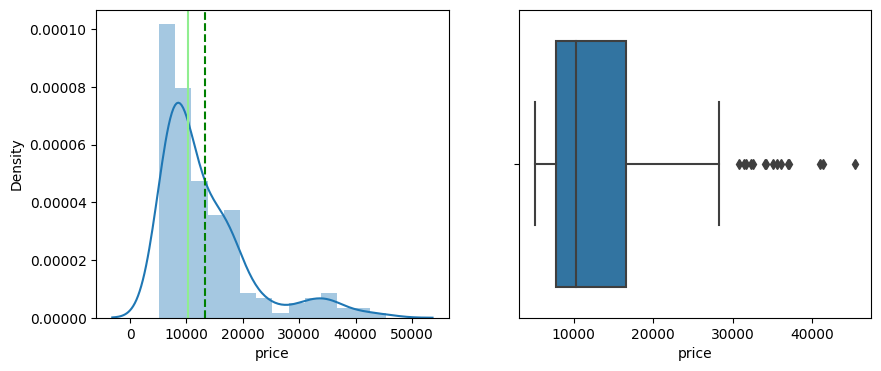

In [5]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(data['price'],kde=True)
plt.axvline(x = data['price'].mean(),color='green', linestyle='dashed')
plt.axvline(x = data['price'].median(),color='lightgreen')
plt.subplot(1,2,2)
sns.boxplot(x = data['price'])
plt.show()



In [6]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
cars = data['CarName'].str.split(' ',n = 1, expand=True)
print(cars)
cars[0].unique()

               0             1
0    alfa-romero        giulia
1    alfa-romero       stelvio
2    alfa-romero  Quadrifoglio
3           audi        100 ls
4           audi         100ls
..           ...           ...
200        volvo     145e (sw)
201        volvo         144ea
202        volvo         244dl
203        volvo           246
204        volvo         264gl

[205 rows x 2 columns]


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
cars[0]= cars[0].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
cars[0].unique()
data['car_brand']= cars[0]
#data[data['car_brand']=='audi']
#data['CarName'][data['car_brand']=='audi']
#data[['CarName','car_brand']]

             volume  avg_price
car_brand                     
toyota           32     9886.0
nissan           18    10416.0
mazda            17    10653.0
mitsubishi       13     9240.0
honda            13     8185.0
volkswagen       12    10078.0
subaru           12     8541.0
peugeot          11    15489.0
volvo            11    18063.0
dodge             9     7875.0
buick             8    33647.0
bmw               8    26119.0
audi              7    17859.0
plymouth          7     7963.0
saab              6    15223.0
porsche           5    31400.0
isuzu             4     8916.0
jaguar            3    34600.0
chevrolet         3     6007.0
alfa-romero       3    15498.0
renault           2     9595.0
mercury           1    16503.0


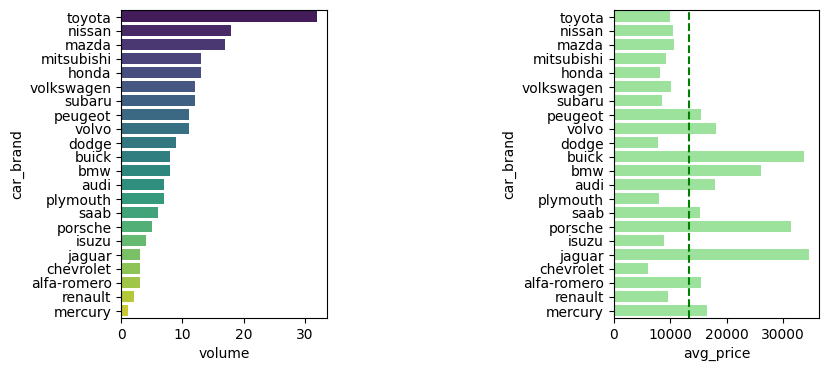

In [9]:
brand = data['car_brand'].value_counts()
price = round(data.groupby('car_brand').agg(volume = ('car_brand','count'),avg_price = ('price', 'mean'))).sort_values(by = 'volume', ascending = False)
print(price)

#sns.barplot(y=brand.index,x = brand.values, palette='viridis')
plt.figure(figsize = (9,4))
plt.subplot(1,3,1)
sns.barplot(y=price.index,x = price['volume'], palette='viridis')
plt.subplot(1,3,3)
sns.barplot(y=price.index,x = price['avg_price'], color = 'lightgreen')
plt.axvline(x = data['price'].mean(),color='green', linestyle='dashed')
plt.show()

In [10]:
cat_col=data.select_dtypes(include=['object']).columns.drop(['CarName','car_brand'])
print(cat_col)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


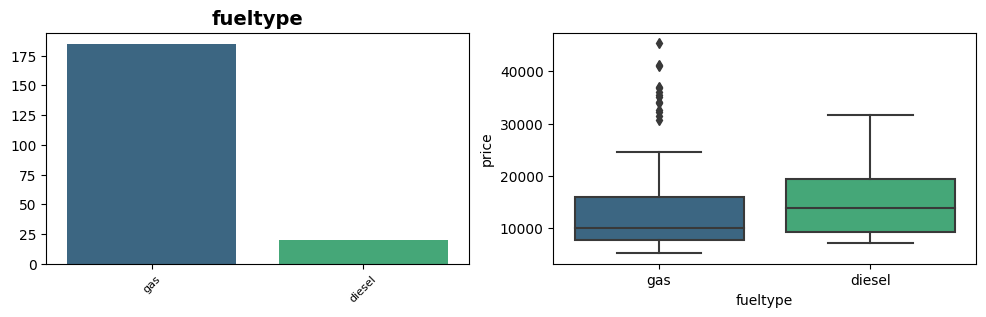

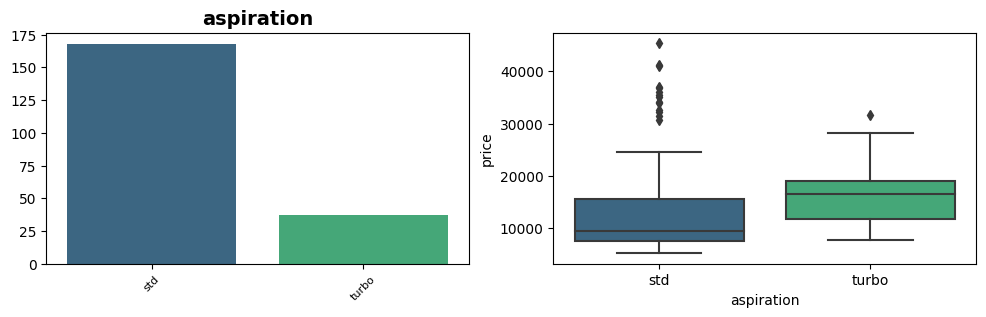

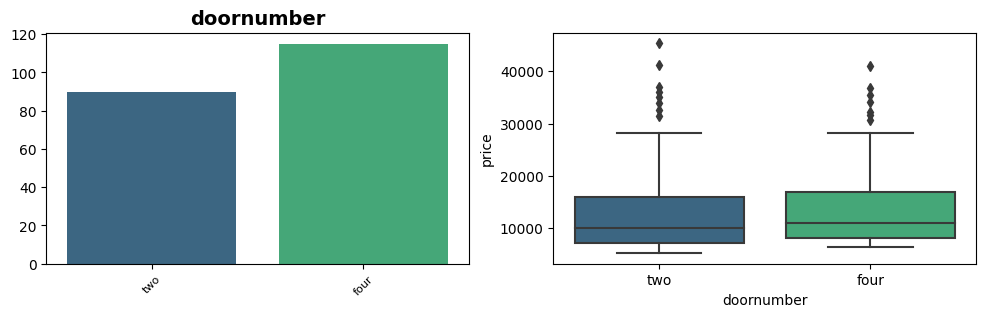

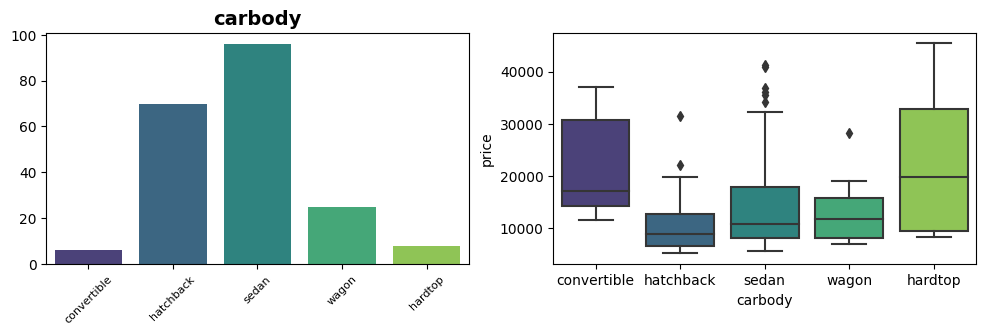

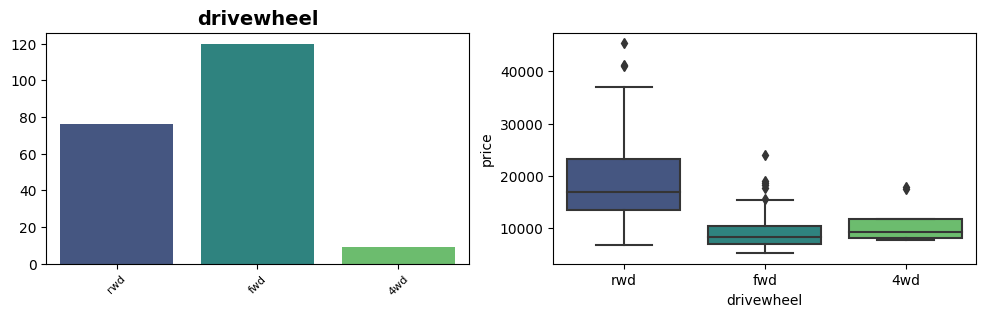

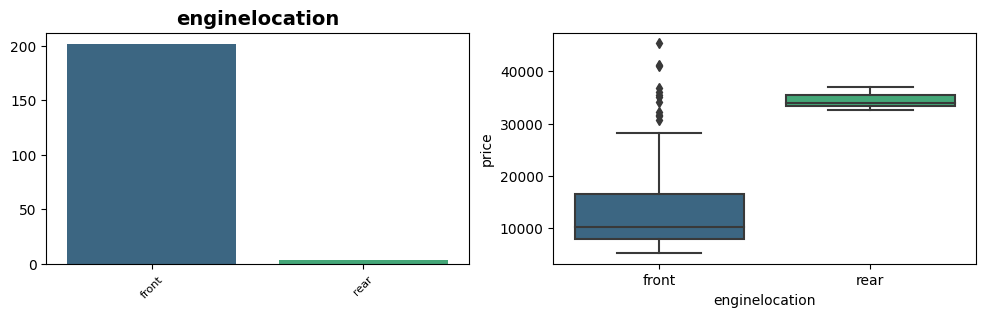

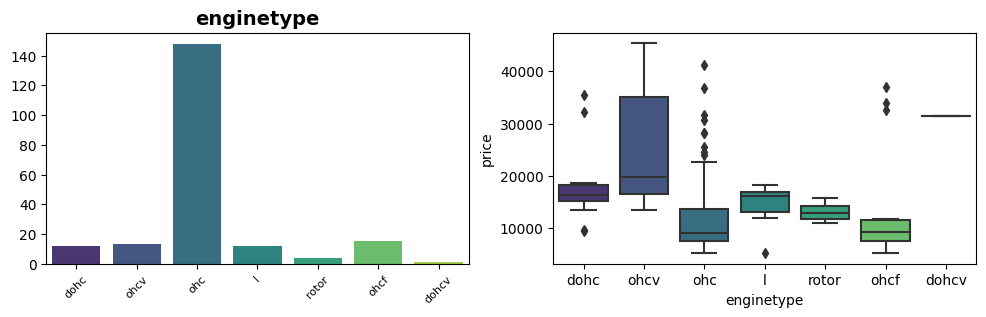

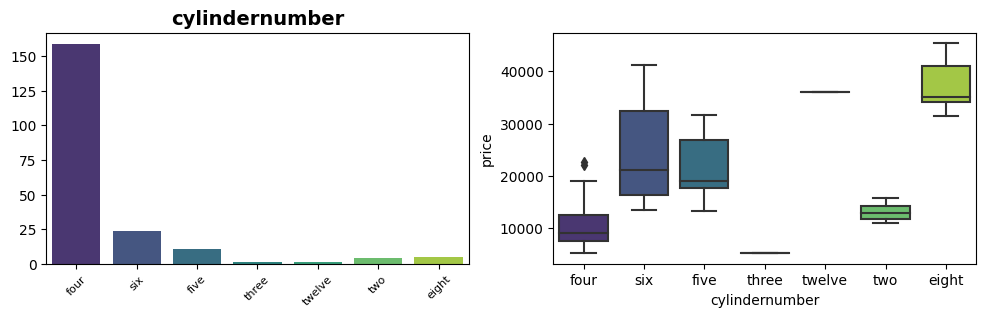

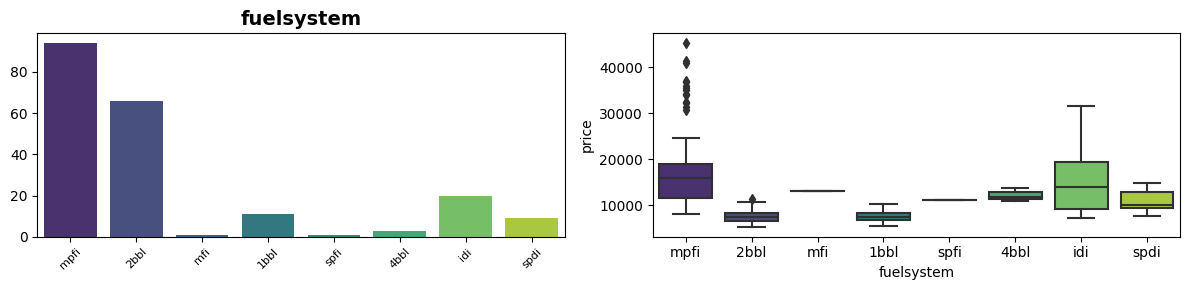

In [11]:
for col in cat_col:
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(col, fontsize=14, fontweight='bold') 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(fontsize = 8, rotation=45) 
    plt.subplot(1, 2, 2)
    sns.boxplot(x = col, y = 'price', data = data, palette='viridis')
    

plt.tight_layout()
plt.show()


In [12]:
num_col=data.select_dtypes(exclude=['object']).columns.drop(['car_ID'])
data[num_col].head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0


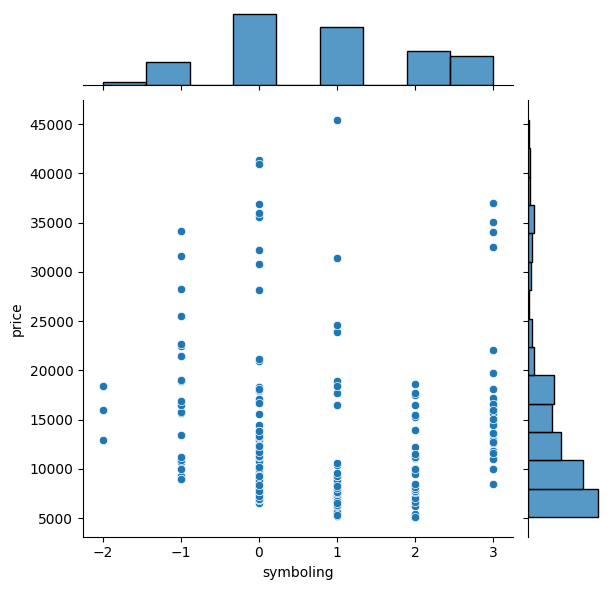

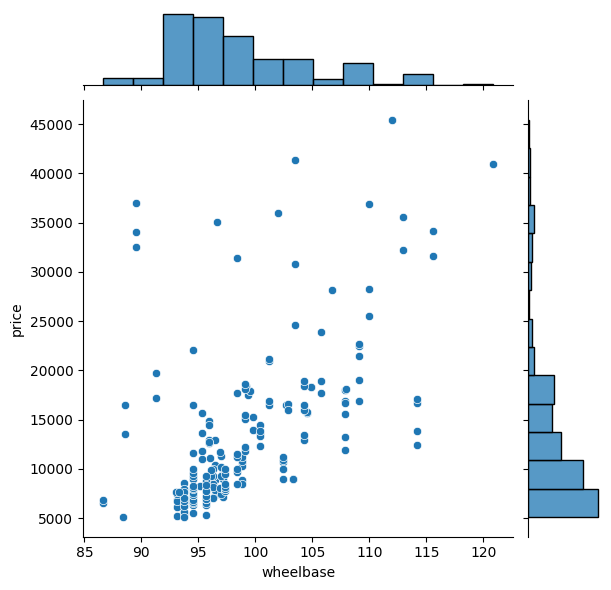

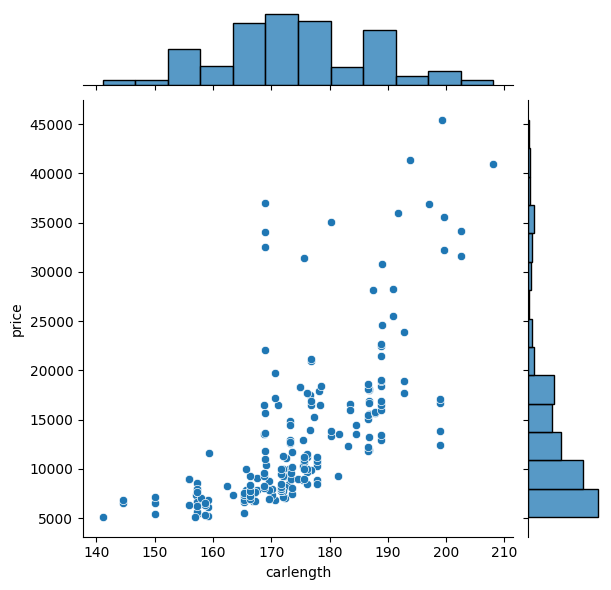

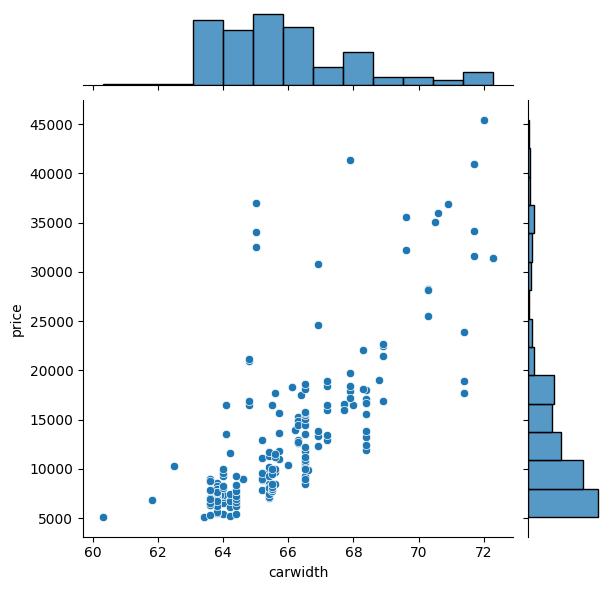

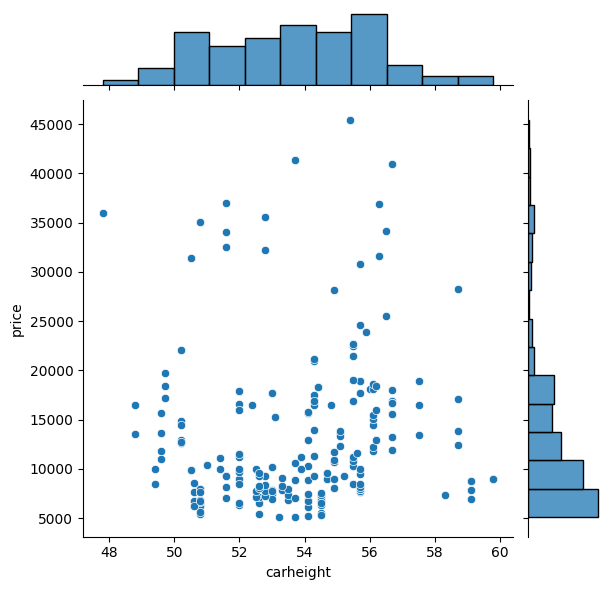

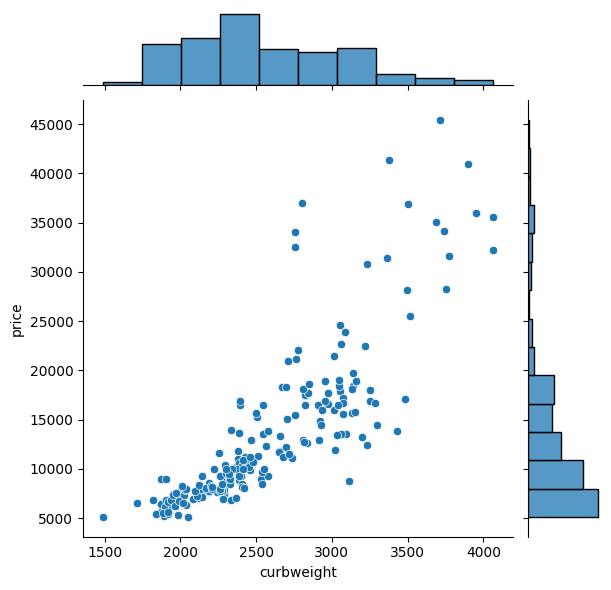

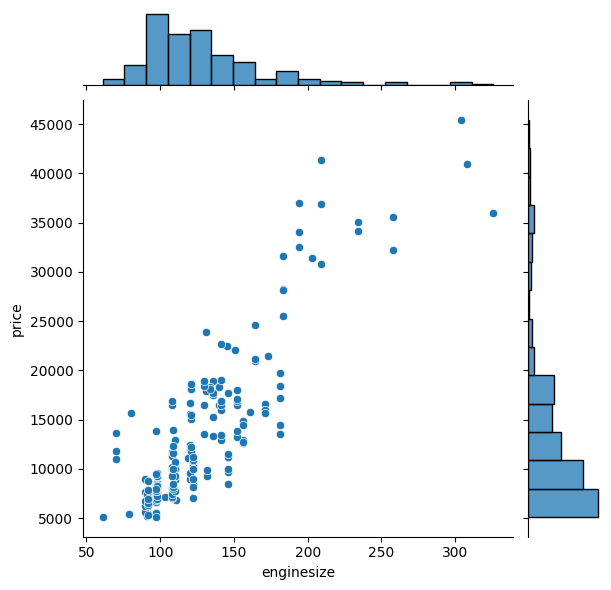

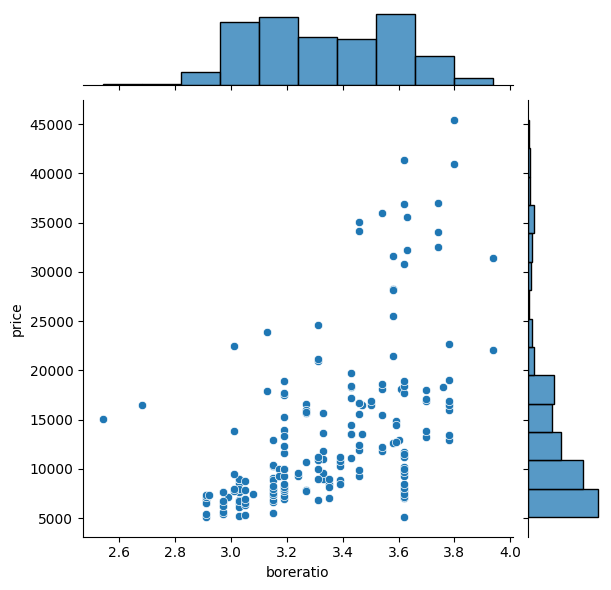

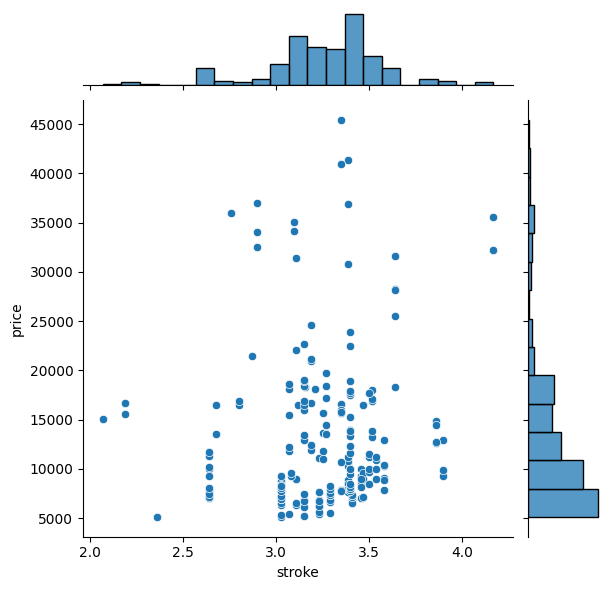

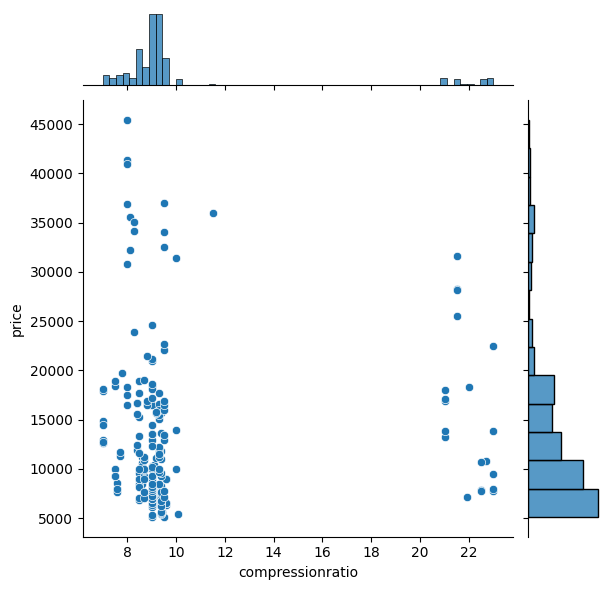

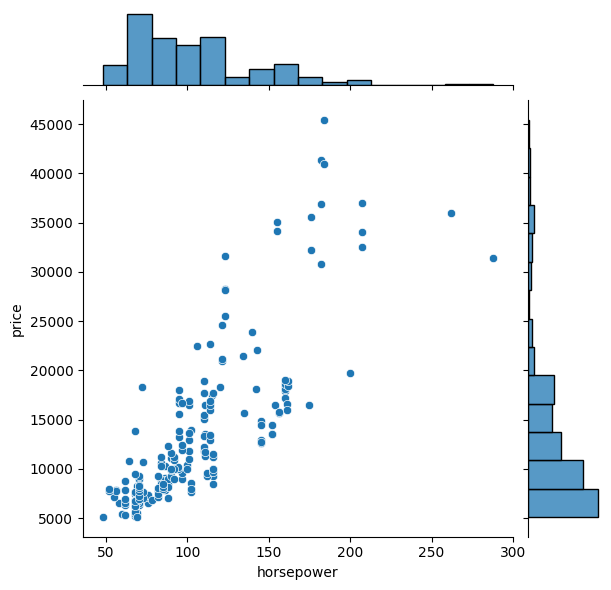

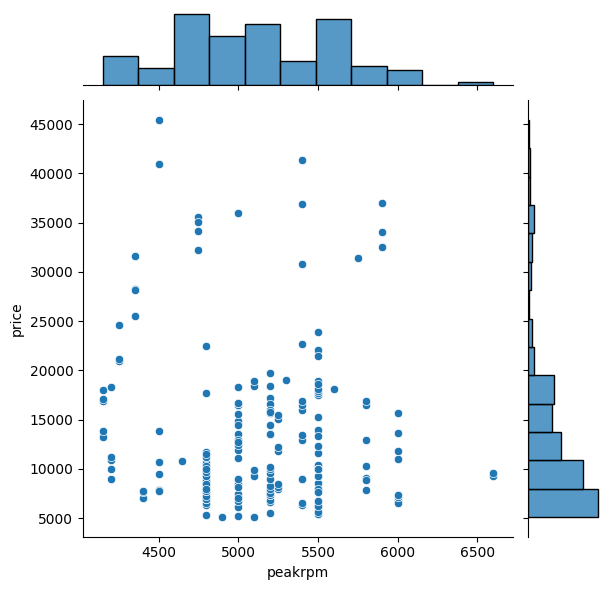

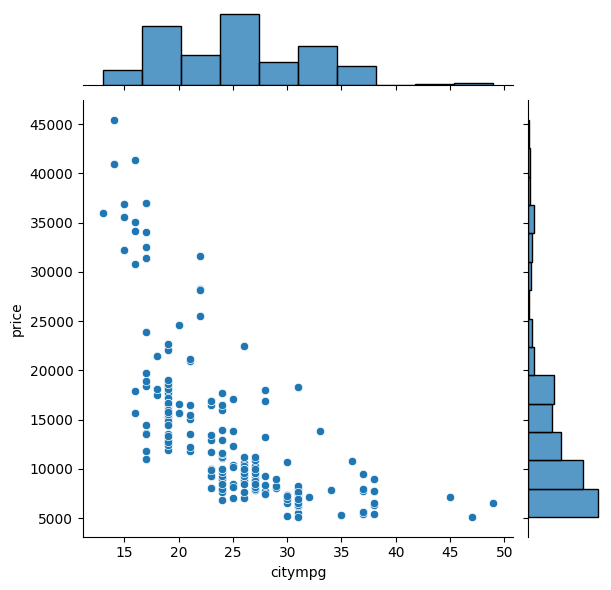

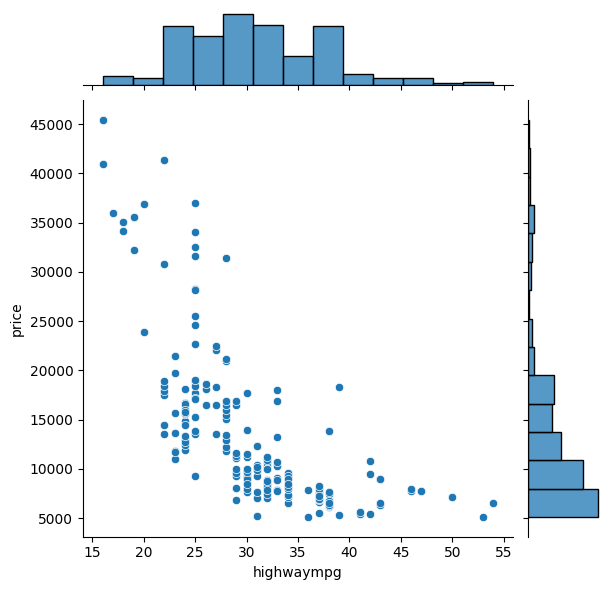

In [13]:
#sns.pairplot(data[['wheelbase','price']])
for col in num_col.drop(['price']):
    #plt.figure(figsize=(10, 10))
    sns.jointplot(x = col, y = 'price', data = data, kind = 'scatter')
    plt.show()


In [14]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(data['price'] >= upper)
lower_array = np.where(data['price'] <= lower)
print(upper)
print(lower_array)
#data.drop(index=upper_array, inplace=True)
#data.drop(index=lower_array, inplace=True)

29575.5
(array([], dtype=int64),)


In [15]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
for col in cat_col:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
X = data.drop(columns = ['car_ID','CarName','car_brand', 'price'])
y = data['price']

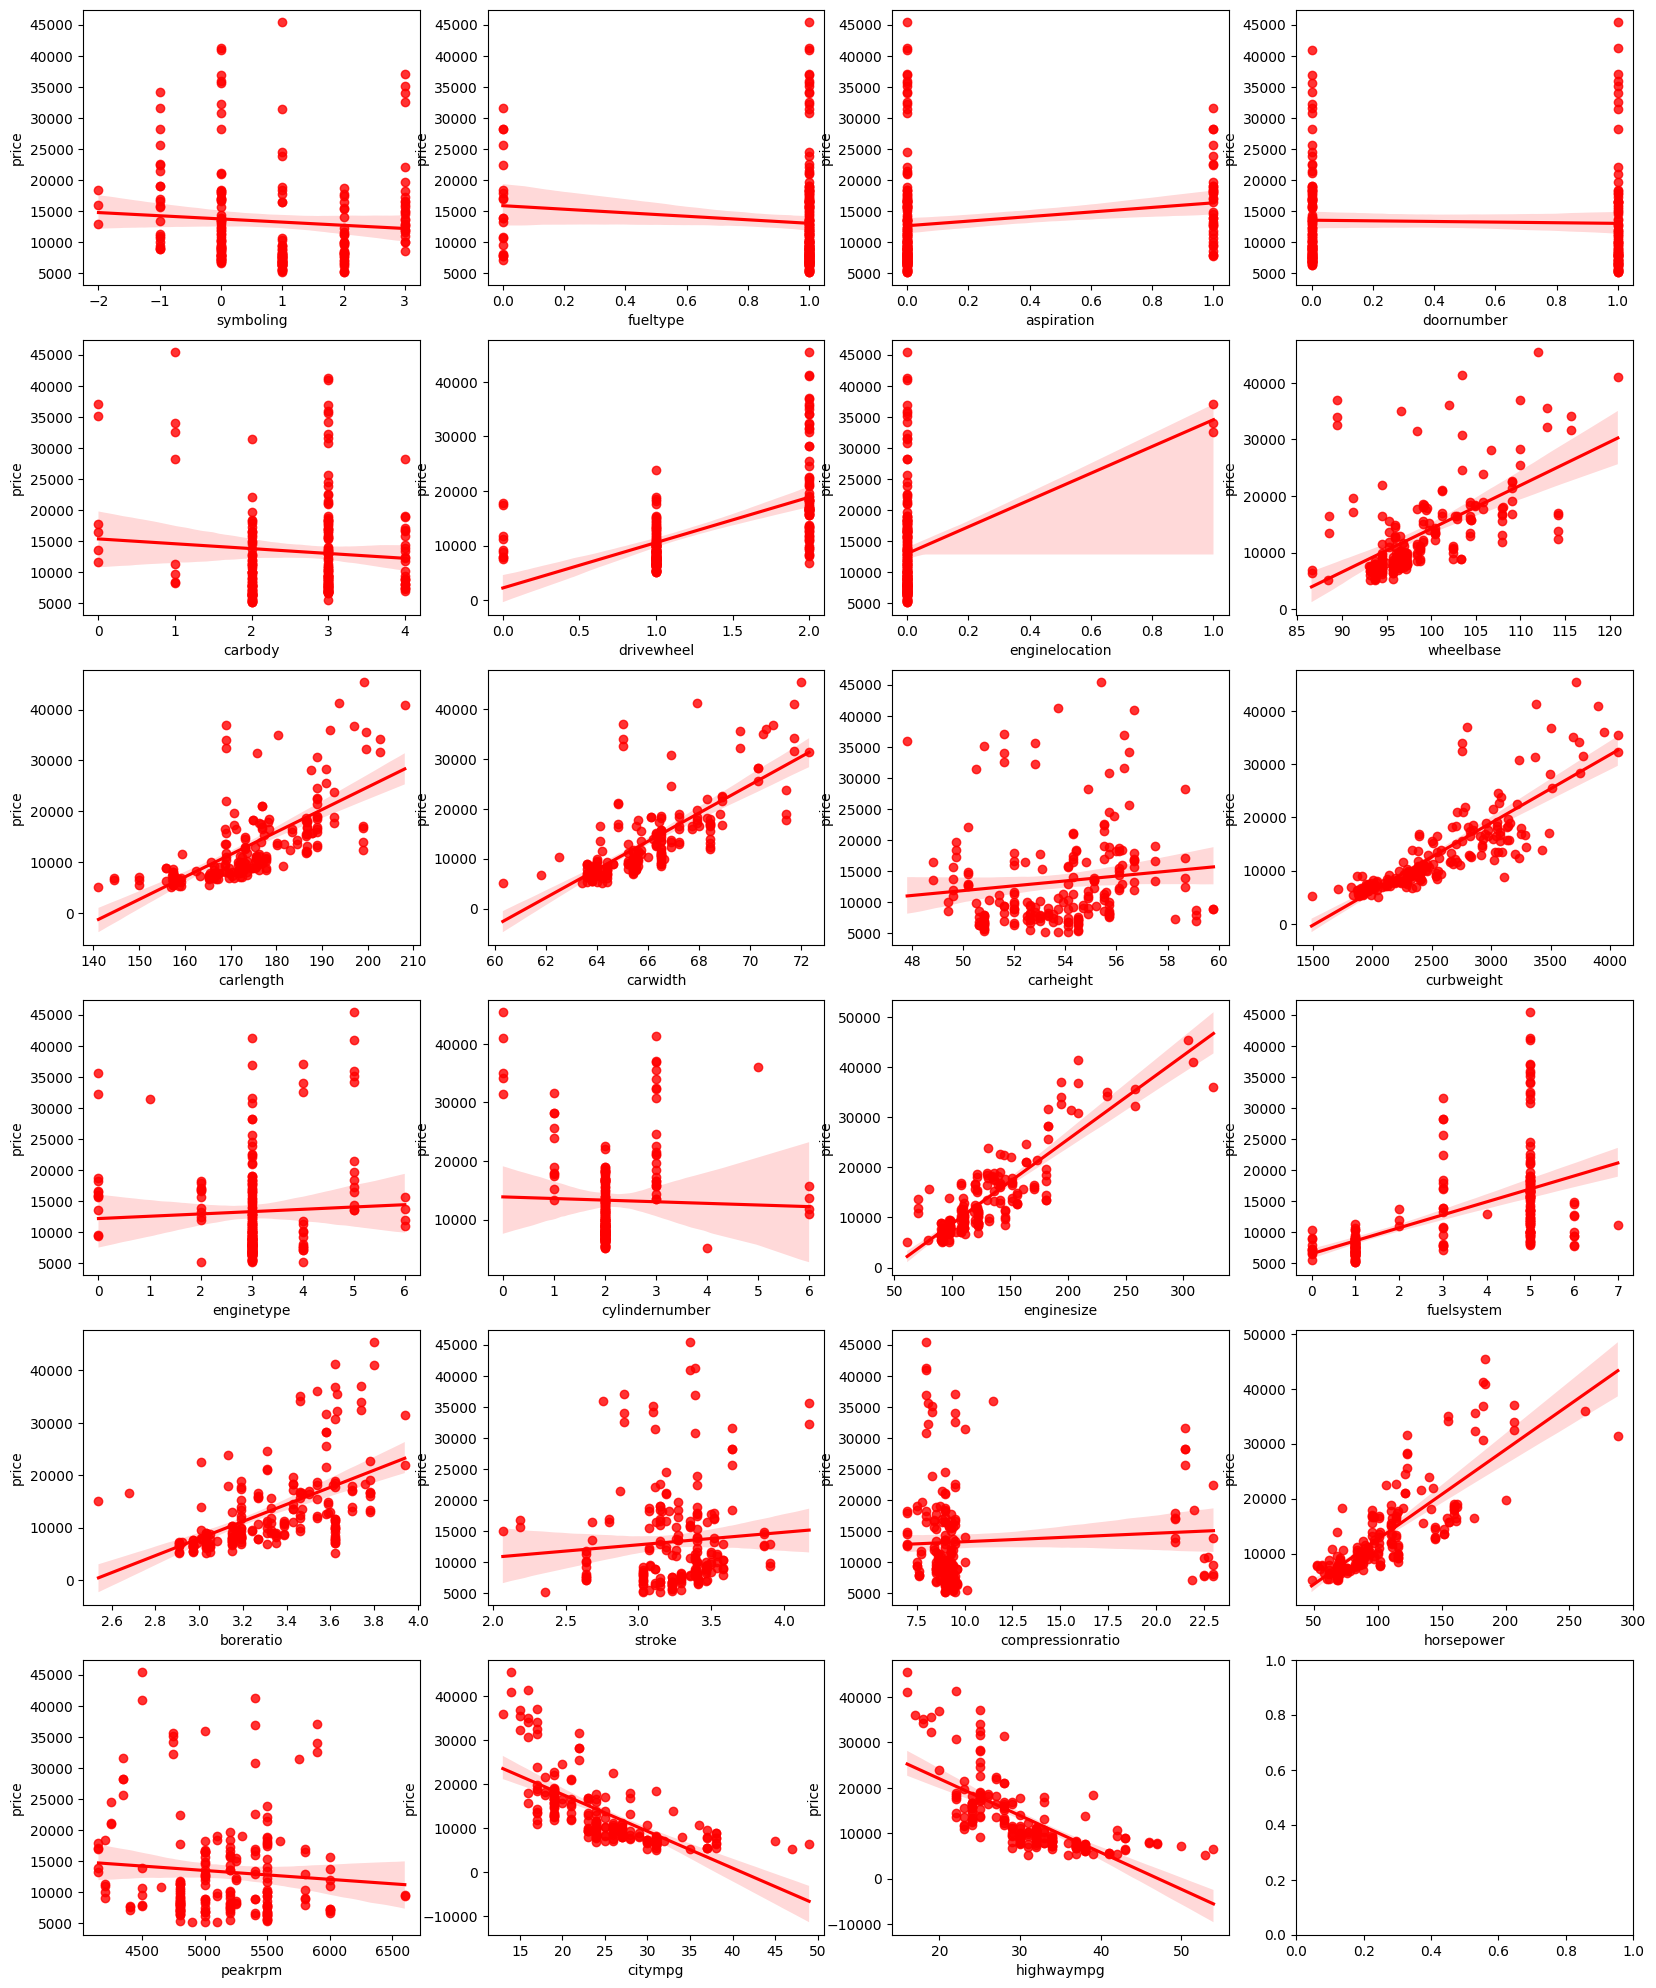

In [17]:
fig,axes = plt.subplots(6,4,figsize=(20,25))
for c,col in enumerate(X):
    
    a,b = c//4,c%4
    sns.regplot(x=col, y='price' ,data=data,ax=axes[a][b],color='r')

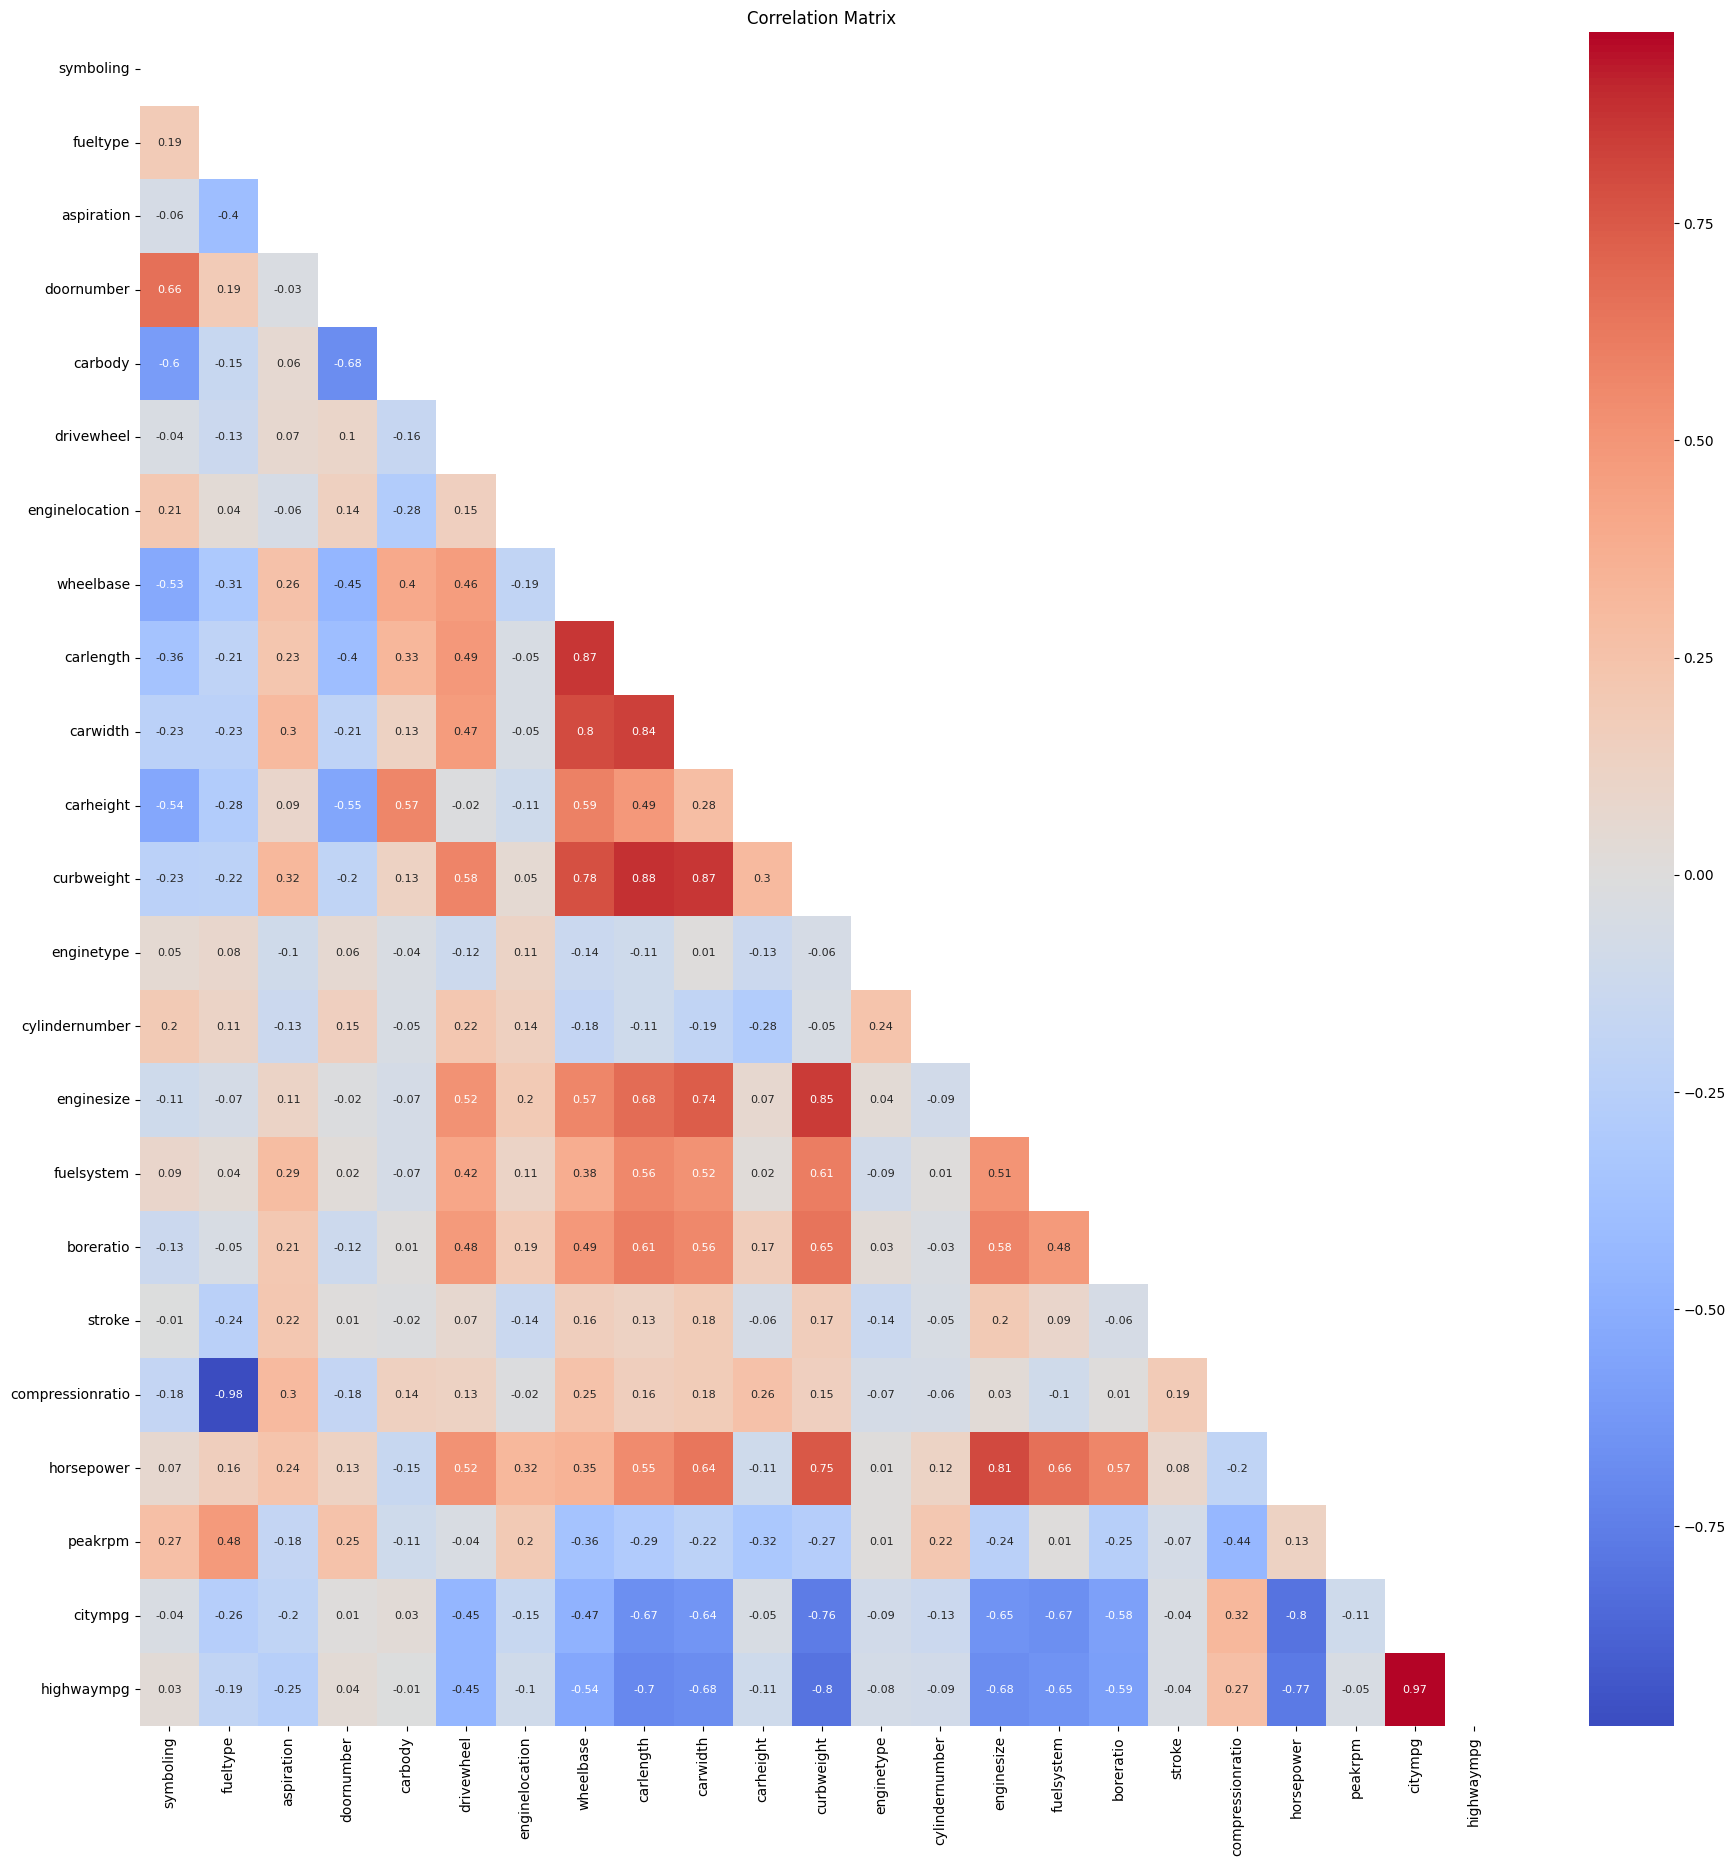

In [18]:
corr= round(X.corr(),2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(22,22))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,  random_state = 10)
print(y_train.shape)
print(y_test.shape)

(153,)
(52,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

n_feature, score = [], []
for i in range (3,15):
    clf = RandomForestRegressor()      
    rfe = RFE(estimator=clf, n_features_to_select=i, step=1)
    rfe = rfe.fit(X, y)
    features=list(X.columns[rfe.support_])
    clf.fit(x_train[features],y_train)
    #train_pred = clf.predict(x_train[features])
    test_pred = clf.predict(x_test[features])
    score_r2 = r2_score(y_test,test_pred)
    n_feature.append(i)
    score.append(score_r2)
    
    
feature_rfe = pd.DataFrame({'Features': n_feature, 'Score': score})  
print(feature_rfe)

#clf = RandomForestRegressor()      
#rfe = RFE(estimator=clf, n_features_to_select=15, step=1)
#rfe = rfe.fit(X, y)
#print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])
#feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
#print(feature_ranking.sort_values(by='Ranking'))

    Features     Score
0          3  0.879260
1          4  0.894498
2          5  0.905295
3          6  0.907831
4          7  0.921263
5          8  0.922270
6          9  0.927397
7         10  0.926006
8         11  0.921262
9         12  0.925784
10        13  0.916932
11        14  0.921991


In [21]:
clf = RandomForestRegressor()      
rfe = RFE(estimator=clf, n_features_to_select=9, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm', 'highwaympg'],
      dtype='object')


In [22]:
features=list(X.columns[rfe.support_])

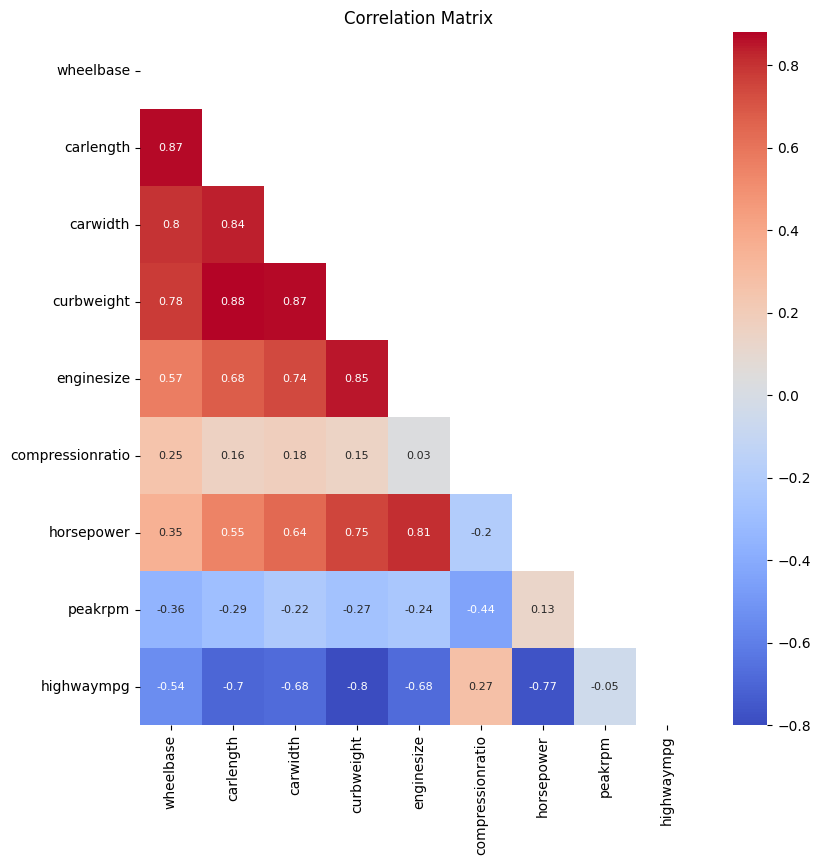

In [23]:
corr= round(X[features].corr(),2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(9,9))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Matrix')
plt.show()

In [24]:
RF_test = RandomForestRegressor()

RF_test.fit(x_train[features],y_train)

RF_test_pred = RF_test.predict(x_test[features])
RF_test_r2 = r2_score(y_test,RF_test_pred)

print(RF_test_r2)

RF_test.get_params()

0.9248919786853732


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
estimator, n_score = [], [] 

for i in [5,10,20,50,100,150]: 
    RF = RandomForestRegressor(n_estimators = i, random_state=101) 
    RF.fit(x_train[features],y_train) 
    RF_pred = RF.predict(x_test[features]) 
    RF_r2 = round(r2_score(y_test,RF_pred), 4) 
    estimator.append(i) 
    n_score.append(RF_r2)

P1 = pd.DataFrame({'Estimator': estimator, 'Score': n_score})
print(estimator) 
print(n_score) 
print(P1)

[5, 10, 20, 50, 100, 150]
[0.9283, 0.9381, 0.931, 0.9319, 0.9274, 0.9262]
   Estimator   Score
0          5  0.9283
1         10  0.9381
2         20  0.9310
3         50  0.9319
4        100  0.9274
5        150  0.9262


In [26]:
depth, d_score = [], [] 

for i in range(2,7): 
    RF = RandomForestRegressor(n_estimators = 10,max_depth= i, random_state=101) 
    RF.fit(x_train[features],y_train) 
    RF_pred = RF.predict(x_test[features]) 
    RF_r2 = round(r2_score(y_test,RF_pred), 4) 
    depth.append(i) 
    d_score.append(RF_r2)

P2 = pd.DataFrame({'Max_depth':depth , 'Score': d_score})

print(P2)

   Max_depth   Score
0          2  0.8892
1          3  0.9032
2          4  0.9212
3          5  0.9357
4          6  0.9320


In [27]:
split, s_score = [], [] 

for i in [5,10, 15, 20, 25]: 
    RF = RandomForestRegressor(n_estimators = 10,max_depth= 5, min_samples_split= i, random_state=101) 
    RF.fit(x_train[features],y_train) 
    RF_pred = RF.predict(x_test[features]) 
    RF_r2 = round(r2_score(y_test,RF_pred), 4) 
    split.append(i) 
    s_score.append(RF_r2)

P3 = pd.DataFrame({'Min_split':split , 'Score': s_score})

print(P3)

   Min_split   Score
0          5  0.9337
1         10  0.9217
2         15  0.9103
3         20  0.8995
4         25  0.8947


In [28]:
RF = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=5, random_state=101)

RF.fit(x_train[features],y_train)

RF_pred = RF.predict(x_test[features]) 
RF_r2 = r2_score(y_test,RF_pred) 
MSE = mean_squared_error(y_test,RF_pred) 
RMSE = np.sqrt(MSE)

print(RF_r2) 
print(MSE) 
print(RMSE)

0.9337071605779534
3856299.807420886
1963.7463704411743


<Axes: xlabel='price', ylabel='Density'>

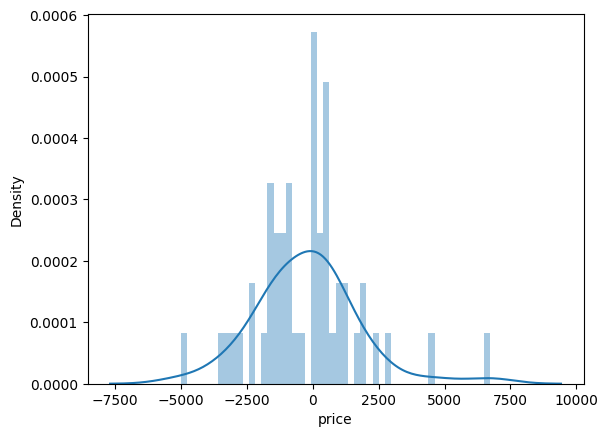

In [29]:
sns.distplot((y_test-RF_pred),bins=50)

Text(0, 0.5, 'Predicted')

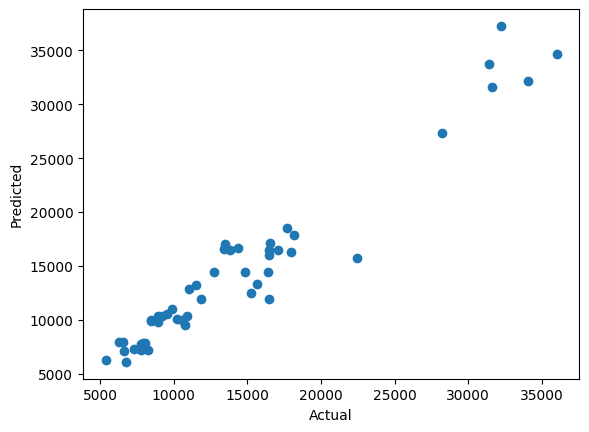

In [30]:
plt.scatter(y_test,RF_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

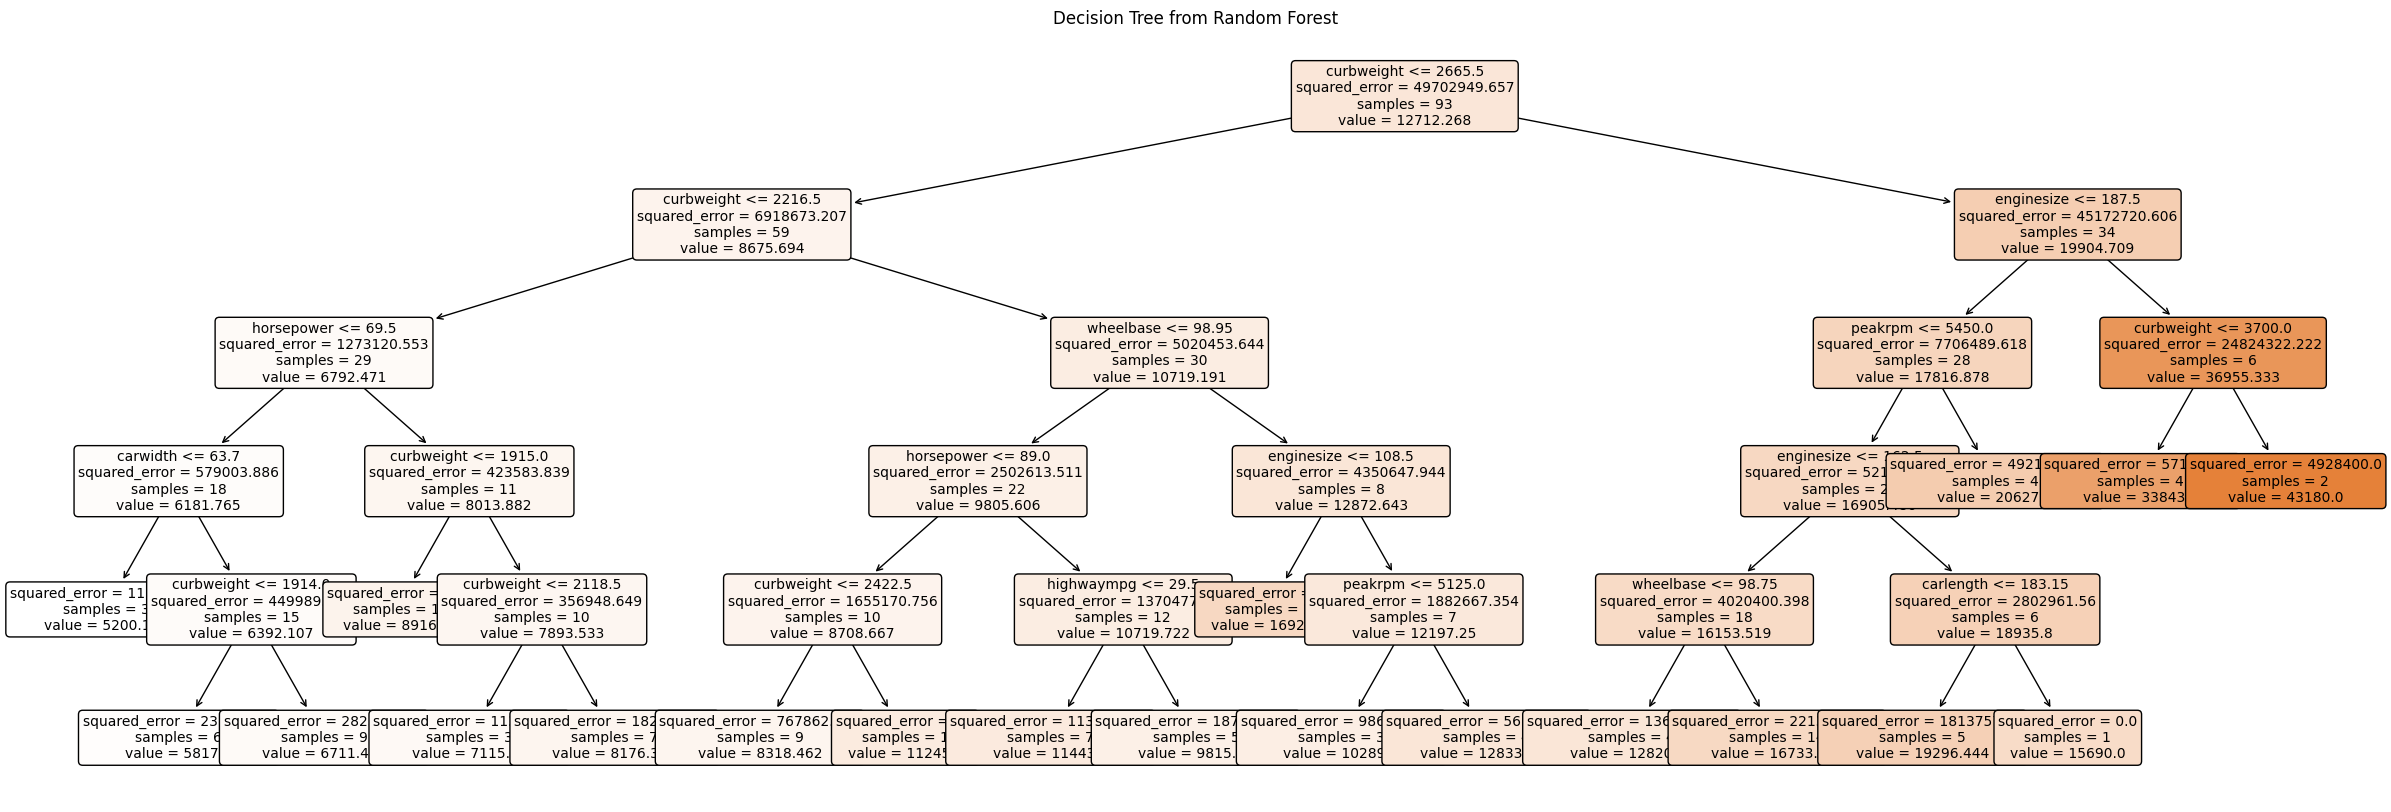

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = RF.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(30, 10))
plot_tree(tree_to_plot, feature_names=X[features].columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [32]:
importances = RF.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

            Feature  Gini Importance
4        enginesize         0.561975
3        curbweight         0.207763
6        horsepower         0.087911
8        highwaympg         0.087305
1         carlength         0.022965
0         wheelbase         0.009782
2          carwidth         0.008491
7           peakrpm         0.008218
5  compressionratio         0.005591


In [33]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train[features],y_train)

print("Independent Feature\tCoefficient".expandtabs(25))
print("="*36)
for i in range(x_train[features].shape[1]):
    print(f"{x_train[features].columns[i]}\t{LR.coef_[i]:0.3f}".expandtabs(25))

Independent Feature      Coefficient
wheelbase                101.676
carlength                -30.148
carwidth                 250.124
curbweight               2.306
enginesize               117.331
compressionratio         199.745
horsepower               53.243
peakrpm                  2.106
highwaympg               37.598


In [34]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(np.array(x_train['enginesize']).reshape(-1,1),y_train)

print('Coefficients: \n', LR.coef_)

Coefficients: 
 [182.13904402]


In [35]:
import statsmodels.api as sm

#X = sm.add_constant(x_train[features])
X = sm.add_constant(x_train['enginesize'])
model = sm.OLS(y_train, X).fit()
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     634.9
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           5.88e-56
Time:                        17:23:40   Log-Likelihood:                -1467.2
No. Observations:                 153   AIC:                             2938.
Df Residuals:                     151   BIC:                             2944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9585.3664    941.440    -10.182      0.0

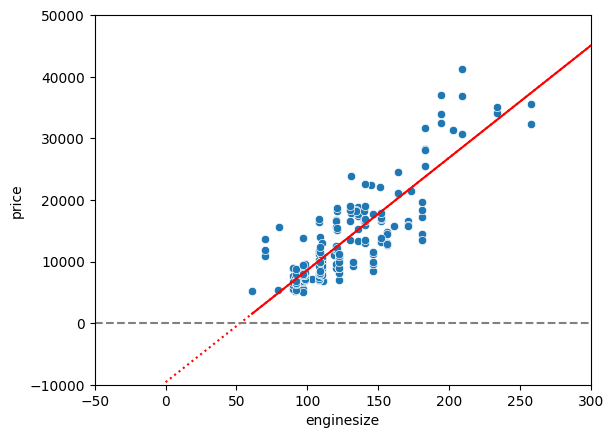

In [36]:
#y = 9585+182*i
prediction = []
for i in data['enginesize']:
    y = model.params[0]+model.params[1]*i
    prediction.append(y)

points_x, points_y = [], []
for i in [0, 300]:
    y = model.params[0]+model.params[1]*i
    points_x.append(i)
    points_y.append(y)

fig = plt.figure()
sns.scatterplot(x='enginesize', y='price',data=data )
sns.lineplot(x=data['enginesize'], y = prediction, color = 'r' )
gfg = sns.lineplot(x=points_x, y = points_y, linestyle = 'dotted', color = 'r' )
gfg.set_ylim(-10000, 50000)
gfg.set_xlim(-50, 300)
plt.axhline(y = 0, linestyle = '--', color = 'gray' )
plt.show()